# Predicting death due to Cardiovascular diseases with Scikit-learn


## Main statistics, how to predict with scikit-learn, comparaison of algorithms and conclusion
. 

This notebook is covering 4 main studies: 

* Understand the main staistics about healtcare related to cardiovascular diseases  
* Discover how to predict death of a patient using scikit-learn
* Compare several ML algorithms using a loop 
* conclusion

the notebook include information and tips to shape data, optimise algorithms and plot intresting plots.



## LIBRAIRIES

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC, LinearSVC
from sklearn import svm

## import Data and reshape

In [342]:
df = pd.read_csv("failure.csv")
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [343]:
df['anaemia'] = df['anaemia'].astype(float)
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].astype(float)
df['diabetes'] = df['diabetes'].astype(float)
df['ejection_fraction'] = df['ejection_fraction'].astype(float)
df['high_blood_pressure'] = df['high_blood_pressure'].astype(float)
df['platelets'] = df['platelets'].astype(float)
df['serum_creatinine'] = df['serum_creatinine'].astype(float)
df['serum_sodium'] = df['serum_sodium'].astype(float)
df['sex'] = df['sex'].astype(float)
df['smoking'] = df['smoking'].astype(float)
df['time'] = df['time'].astype(float)

In [344]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    float64
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    float64
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    float64
 10  smoking                   299 non-null    float64
 11  time                      299 non-null    float64
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 30.5 KB


In [345]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [346]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [347]:
#preprocess data
bins =(-1,0.5,2)
groups_names=['survived','dead']
df['DEATH_EVENT'] = pd.cut(df['DEATH_EVENT'], bins=bins, labels = groups_names)
df['DEATH_EVENT'].unique()

[dead, survived]
Categories (2, object): [survived < dead]

In [348]:
label_quality=LabelEncoder()
df['DEATH_EVENT'] = label_quality.fit_transform(df['DEATH_EVENT'])


In [349]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,0
5,90.0,1.0,47.0,0.0,40.0,1.0,204000.00,2.1,132.0,1.0,1.0,8.0,0
6,75.0,1.0,246.0,0.0,15.0,0.0,127000.00,1.2,137.0,1.0,0.0,10.0,0
7,60.0,1.0,315.0,1.0,60.0,0.0,454000.00,1.1,131.0,1.0,1.0,10.0,0
8,65.0,0.0,157.0,0.0,65.0,0.0,263358.03,1.5,138.0,0.0,0.0,10.0,0
9,80.0,1.0,123.0,0.0,35.0,1.0,388000.00,9.4,133.0,1.0,1.0,10.0,0


In [350]:
df['DEATH_EVENT'].value_counts()

1    203
0     96
Name: DEATH_EVENT, dtype: int64

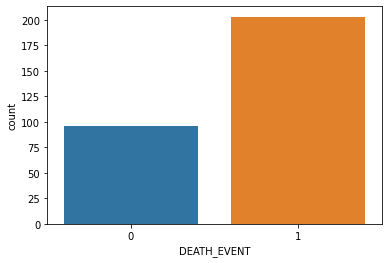

In [351]:
sns.countplot(df['DEATH_EVENT'])

In [352]:
#Now we can separate the dataset as response variable and feature variable
X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

## Some statistics and studies before using ML tools

In [353]:

corr = df.corr() #Correlation matrix for CB player
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,-0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,-0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,-0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,-0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,-0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,0.004316


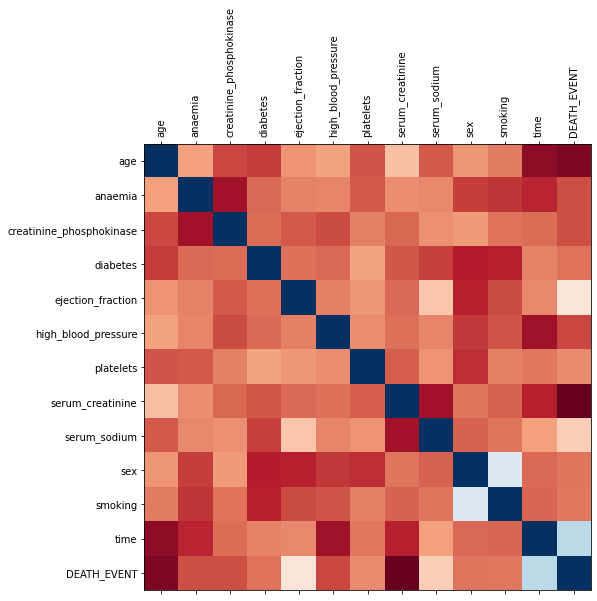

In [354]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

We compare platelets statistics between survivors and dead patient, we dont see any significant difference expect more extrems values within the dead group

Text(0, 0.5, 'platelets')

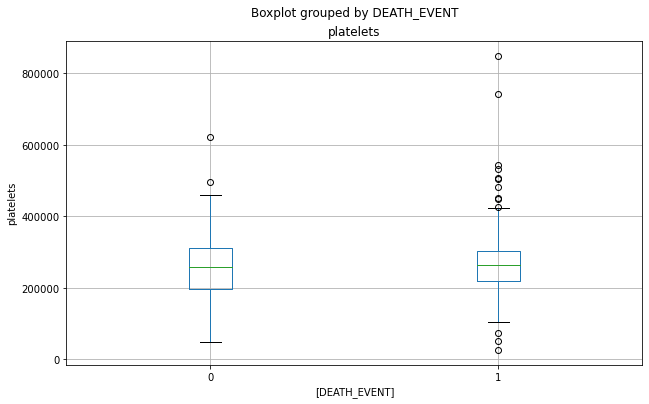

In [355]:
ax = df[['platelets', 'DEATH_EVENT']].boxplot(by='DEATH_EVENT', figsize=(10,6))
ax.set_ylabel('platelets')

The same analysis is made with a factor that is showed by the correlation matrix to be important in the death probability. 
It is confirmed by the next plot with a significant difference of death regarding the ejection fraction

Text(0, 0.5, 'ejection_fraction')

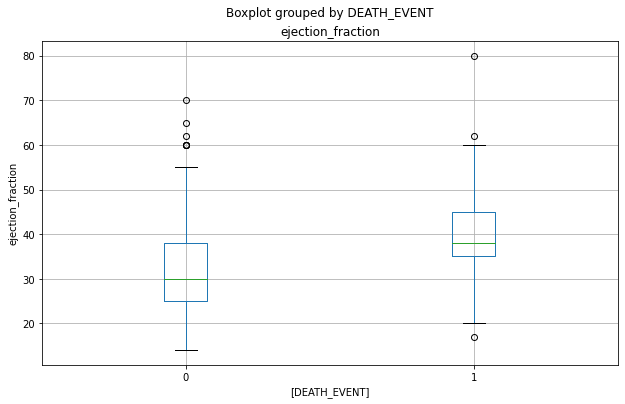

In [356]:
ax = df[['ejection_fraction', 'DEATH_EVENT']].boxplot(by='DEATH_EVENT', figsize=(10,6))
ax.set_ylabel('ejection_fraction')

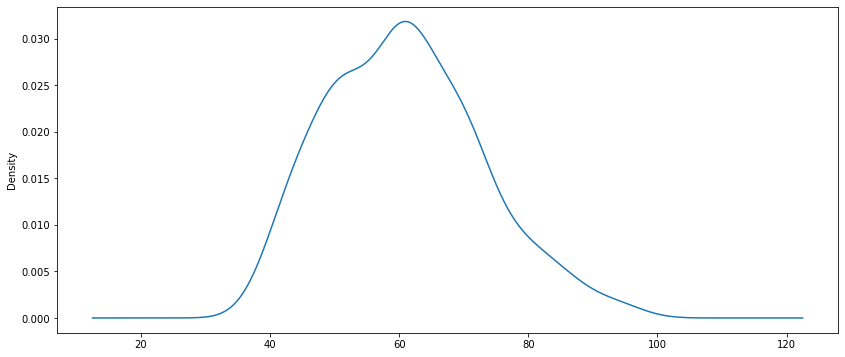

In [357]:
df['age'].plot(kind='density', figsize=(14,6))

## Prepare inputs for ML tools

In [358]:
all_inputs = df[['age','anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
'sex', 'smoking', 'time']].values
# extracting quality labels
all_labels = df['DEATH_EVENT'].values
# a test to see what the inputs look like
all_inputs[:2]

array([[7.5000000e+01, 0.0000000e+00, 5.8200000e+02, 0.0000000e+00,
        2.0000000e+01, 1.0000000e+00, 2.6500000e+05, 1.9000000e+00,
        1.3000000e+02, 1.0000000e+00, 0.0000000e+00, 4.0000000e+00],
       [5.5000000e+01, 0.0000000e+00, 7.8610000e+03, 0.0000000e+00,
        3.8000000e+01, 0.0000000e+00, 2.6335803e+05, 1.1000000e+00,
        1.3600000e+02, 1.0000000e+00, 0.0000000e+00, 6.0000000e+00]])

In [359]:
#Apply standar scaling not to have overweight parameters

sc=StandardScaler()
X_train = sc.fit_transform(X_train)


In [360]:
#Train and split the data
X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size= 0.2, random_state=42)

In [361]:
#Test of firsts values
X_train[:1]

array([[7.50e+01, 1.00e+00, 2.46e+02, 0.00e+00, 1.50e+01, 0.00e+00,
        1.27e+05, 1.20e+00, 1.37e+02, 1.00e+00, 0.00e+00, 1.00e+01]])

# Data ready to be compiled into ML tools - Test of few ML tools 

# Decision tree  Classifier

In [362]:
#trying decision tree classfier 



# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()


# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)


# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(X_test, y_test)

0.6666666666666666

## Random Forest Classifier


In [363]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [364]:
pred_rfc[:20]

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [365]:
X_test[:2]

array([[7.00e+01, 0.00e+00, 5.82e+02, 0.00e+00, 4.00e+01, 0.00e+00,
        5.10e+04, 2.70e+00, 1.36e+02, 1.00e+00, 1.00e+00, 2.50e+02],
       [5.00e+01, 1.00e+00, 2.98e+02, 0.00e+00, 3.50e+01, 0.00e+00,
        3.62e+05, 9.00e-01, 1.40e+02, 1.00e+00, 1.00e+00, 2.40e+02]])

In [366]:
# Let's see  the RFC efficients 
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.48      0.60        25
           1       0.71      0.91      0.80        35

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60

[[12 13]
 [ 3 32]]


In [367]:

# Validate the classifier on the testing set using classification accuracy
rfc.score(X_test, y_test)

0.7333333333333333

 # SVM Classifier

In [368]:
Clf = svm.SVC()
Clf.fit(X_train,y_train)
pref_clf = Clf.predict(X_test)

In [369]:
# Let's see  the SVM efficients 
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.48      0.60        25
           1       0.71      0.91      0.80        35

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60

[[12 13]
 [ 3 32]]


In [370]:

# Validate the classifier on the testing set using classification accuracy
clf.score(X_test, y_test)

0.7333333333333333

# Testing other  ML methods using a loop and comparing results! 

In [371]:
#selecting the models and the model names in an array
models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB()]
model_names=['Logistic Regression',
             'Linear SVM',
             'rbf SVM',
             'K-Nearest Neighbors',
             'Random Forest Classifier',
             'Decision Tree',
             'Gradient Boosting Classifier',
             'Gaussian NB']


# creating an accuracy array and a matrix to join the accuracy of the models
# and the name of the models so we can read the results easier
acc=[]
m={}


# next we're going to iterate through the models, and get the accuracy for each
for model in range(len(models)):
     clf=models[model]
     clf.fit(X_train,y_train)
     pred=clf.predict(X_test)
     acc.append(accuracy_score(pred,y_test))


m={'Algorithm':model_names,'Accuracy':acc}


# just putting the matrix into a data frame and listing out the results
acc_frame=pd.DataFrame(m)
acc_frame

C:\Users\louas\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Algorithm,Accuracy
0,Logistic Regression,0.800000
1,Linear SVM,0.583333
2,rbf SVM,0.583333
3,K-Nearest Neighbors,0.533333
4,Random Forest Classifier,0.750000
5,Decision Tree,0.650000
6,Gradient Boosting Classifier,0.750000
7,Gaussian NB,0.733333


# How to optimize parameters for a specific algorithm. Random forest classifier case

In [372]:
random_forest_classifier = RandomForestClassifier()


# setting up the parameters for our grid search
# You can check out what each of these parameters mean on the Scikit webiste!
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
parameter_grid = {'n_estimators': [10, 25, 50, 100, 200],
'max_features': ['auto', 'sqrt', 'log2'],
'criterion': ['gini', 'entropy'],
'max_features': [1, 2, 3, 4]}


# Stratified K-Folds cross-validator allows us mix up the given test/train data per run
# with k-folds each test set should not overlap across all shuffles. This allows us to 
# ultimately have "more" test data for our model
cross_validation = StratifiedKFold(n_splits=10)


# running the grid search function with our random_forest_classifer, our parameter grid
# defineda bove, and our cross validation method
grid_search = GridSearchCV(random_forest_classifier,
param_grid=parameter_grid,
cv=cross_validation)


# using the defined grid search above, we're going to test it out on our
# data set
grid_search.fit(all_inputs, all_labels)


# printing the best scores, parameters, and estimator for our Random Forest classifer
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


grid_search.best_estimator_

Best score: 0.7956321839080459
Best parameters: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 100}


RandomForestClassifier(criterion='entropy', max_features=1)

In [373]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',

          max_depth=None, max_features=2, max_leaf_nodes=None,

          min_impurity_decrease=0.0, min_impurity_split=None,

          min_samples_leaf=1, min_samples_split=2,

          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,

          oob_score=False, random_state=None, verbose=0,

          warm_start=False)

RandomForestClassifier(criterion='entropy', max_features=2, n_jobs=1)

# Test of the new optimised Random forest classifier 

In [374]:
random_forest_classifier = grid_search.best_estimator_


rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Random Forest'] * 10})
rf_df.mean()

accuracy    0.762299
dtype: float64

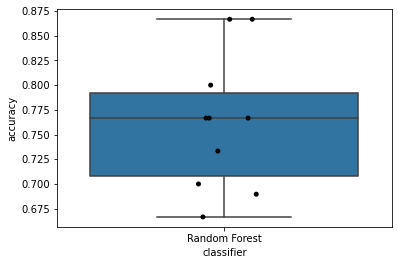

In [375]:
sns.boxplot(x='classifier', y='accuracy', data=rf_df)
sns.stripplot(x='classifier', y='accuracy', data=rf_df, jitter=True, color='black')